# DBT Experiment 9
**ETL (Extract Transform Load)**

In [1]:
!pip install mysql-connector-python

Defaulting to user installation because normal site-packages is not writeable


In [2]:
import mysql.connector
import pandas as pd

__*Extract :*__

In [3]:
conn = mysql.connector.connect(user='root',password='pass@123',host='localhost',database='Experiment9')
cursor=conn.cursor()

In [4]:
data = pd.read_csv('customer1.csv')
data.head()

,customer_Id,first_name,last_name,country,email
0,101,Sheryl,Baxter,Chile,zunigavanessa@smith.info
1,102,Preston,Lozano,Djibouti,vmata@colon.com
2,103,Roy,Berry,Antigua and Barbuda,beckycarr@hogan.com
3,104,Linda,Olsen,Dominican Republic,stanleyblackwell@benson.org
4,105,Joanna,Bender,Slovakia (Slovak Republic),colinalvarado@miles.net


__*Transform :*__

In [5]:
data.fillna('',inplace=True)
data.drop_duplicates(inplace=True)

data = data[data['email'].str.contains('@',na=False)]

print("Data transformed successfully.")

Data transformed successfully.


In [6]:
cols = ",".join([str(i) for i in data.columns.tolist()])

__*Load :*__

In [7]:
for i,row in data.iterrows():
    sql = f""" INSERT INTO customercleaned({cols})
        VALUES (%s, %s, %s, %s, %s)
        ON DUPLICATE KEY UPDATE
        first_name = VALUES(first_name),
        last_name = VALUES(last_name),
        country = VALUES(country),
        email = VALUES(email)"""
    cursor.execute(sql,(row['customer_Id'],row['first_name'],row['last_name'],row['country'],row['email']))


In [8]:
conn.commit()


In [9]:
cursor.close()

True

In [10]:
conn.close()

In [11]:
print("Data successfully stored in the 'customercleaned' table.")

Data successfully stored in the 'customercleaned' table.


__*Output File & Visualisation :*__

In [12]:
output_file = 'transformed_customer.csv'
data.to_csv(output_file, index=False)

In [13]:
print(f"Data loaded into CSV file : {output_file}")
transformed_data = pd.read_csv(output_file)

Data loaded into CSV file : transformed_customer.csv


In [14]:
# Display the first few rows (by default, it shows 5 rows)
print(transformed_data.head())

   customer_Id first_name last_name                     country  \
0          101     Sheryl    Baxter                       Chile   
1          102    Preston    Lozano                    Djibouti   
2          103        Roy     Berry         Antigua and Barbuda   
3          104      Linda     Olsen          Dominican Republic   
4          105     Joanna    Bender  Slovakia (Slovak Republic)   

                         email  
0     zunigavanessa@smith.info  
1              vmata@colon.com  
2          beckycarr@hogan.com  
3  stanleyblackwell@benson.org  
4      colinalvarado@miles.net  


In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

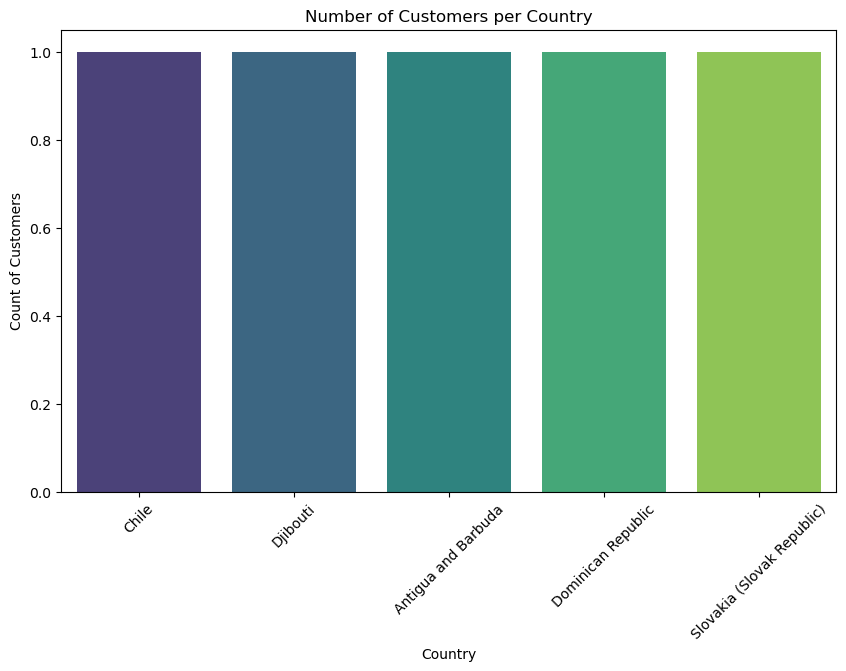

In [16]:
plt.figure(figsize=(10,6))
sns.countplot(x='country', data=data, palette='viridis')
plt.title("Number of Customers per Country")
plt.xlabel('Country')
plt.ylabel('Count of Customers')
plt.xticks(rotation=45)
plt.show()